In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('extended_fmcg_demand_forecasting.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1000 non-null   object 
 1   Product_Category         1000 non-null   object 
 2   Sales_Volume             1000 non-null   int64  
 3   Price                    1000 non-null   float64
 4   Promotion                1000 non-null   int64  
 5   Store_Location           1000 non-null   object 
 6   Weekday                  1000 non-null   int64  
 7   Supplier_Cost            1000 non-null   float64
 8   Replenishment_Lead_Time  1000 non-null   int64  
 9   Stock_Level              1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


In [ ]:
# This line prints the first 5 rows of the table
print(df.head())


       Date  new_price  Product_Category  Store_Location  Promotion  Weekday  \
0  1/1/2022   9.347633                 0               0          0        5   
1  2/1/2022  16.673568                 1               0          0        6   
2  3/1/2022  15.823768                 2               1          0        0   
3  4/1/2022  16.968596                 1               0          1        1   
4  5/1/2022   4.309673                 1               1          1        2   

   Replenishment_Lead_Time  Supplier_Cost  Sales_Volume  
0                        9       9.299281           471  
1                        5      13.274109           527  
2                        9      13.302265           581  
3                        5      10.056158           530  
4                        8       3.562862           880  


In [ ]:
# This line tells Python to treat the 'Date' column as actual dates
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# Create a new, simple table with only the columns Prophet needs
prophet_df = df[['Date', 'Sales_Volume']].copy()

# Rename the columns to 'ds' and 'y' for Prophet
prophet_df.rename(columns={'Date': 'ds', 'Sales_Volume': 'y'}, inplace=True)

# Print the first 5 rows of our new, AI-ready table
print("This is the data ready for our AI model:")
print(prophet_df.head())

This is the data ready for our AI model:
          ds    y
0 2022-01-01  471
1 2022-01-02  527
2 2022-01-03  581
3 2022-01-04  530
4 2022-01-05  880


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsgp0grk/ol8eyul7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsgp0grk/s747vmm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4492', 'data', 'file=/tmp/tmpqsgp0grk/ol8eyul7.json', 'init=/tmp/tmpqsgp0grk/s747vmm1.json', 'output', 'file=/tmp/tmpqsgp0grk/prophet_modeld7spj5dn/prophet_model-20250905070938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Here are the model's predictions:
             ds        yhat  yhat_lower   yhat_upper
1025 2024-10-22  742.196718  392.434721  1079.475570
1026 2024-10-23  849.145805  526.974957  1211.795527
1027 2024-10-24  868.088537  513.470769  1209.666432
1028 2024-10-25  976.174175  626.768288  1317.252105
1029 2024-10-26  909.781457  570.198761  1257.988826


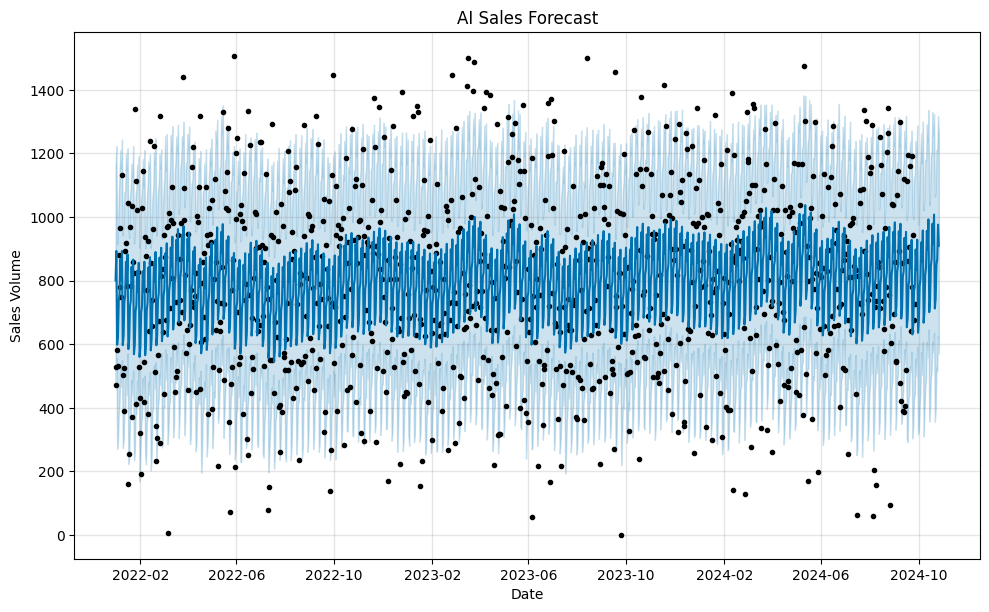

In [ ]:
# This line installs the Prophet library. It might take a minute.
!pip install prophet

# Now we import the tools we need
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Create the AI model
model = Prophet()

# 2. Train the model with our 'ds' and 'y' data
model.fit(prophet_df)

# 3. Create a table for the next 30 days to make predictions on
future = model.make_future_dataframe(periods=30)

# 4. Ask the model to predict the future
forecast = model.predict(future)

# Let's look at the predictions
print("Here are the model's predictions:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 5. Create a plot of the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('AI Sales Forecast')
plt.show()


In [1]:
from sklearn.metrics import mean_absolute_error

# The 'forecast' table contains predictions for both past and future dates.
# We need to compare the predictions for the past with the actual sales data.
# We will merge the original data with the forecast data to do this.

# This creates a table that has both the actual 'y' and the predicted 'yhat' for each date.
comparison_df = forecast.set_index('ds').join(prophet_df.set_index('ds'))
comparison_df = comparison_df.dropna() # Remove future dates that don't have actuals

# Now we calculate the Mean Absolute Error
mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

print(f"The Mean Absolute Error (MAE) of our model is: {mae}")
print(f"This means, on average, our sales forecast was off by about {round(mae)} units.")



NameError: name 'forecast' is not defined